# Style setup

In [1]:
import seaborn as sns
sns.set_theme(context='paper',
             style = 'whitegrid')

from matplotlib import pyplot as plt

# Locations setup

In [2]:
imagefolder = '../images/'

# Gather all the data!
## Starting with Hall

In [3]:
import import_ipynb
import hall_data

importing Jupyter notebook from hall_data.ipynb


In [4]:
hall_df = hall_data.get_df()
hall_df.columns

Index(['doping', 'capping', 'anneal', 'filename', 'mu_H', 'Carrier type', 'n',
       'n_sh', 'R_H', 'R_H_sh', 'rho', 'rho_sh', 'V_H', 'd'],
      dtype='object')

## and $\rho_c$

In [5]:
from rho_c_data import full_df as rho_df

importing Jupyter notebook from rho_c_data.ipynb


## and SE

In [6]:
from SE_batch_data import param_df, optics_df

importing Jupyter notebook from SE_batch_data.ipynb


In [7]:
from analysis import df

importing Jupyter notebook from analysis.ipynb
importing Jupyter notebook from SESnaps_data.ipynb


## Merge Hall and SE, these should behave similarly

# Time to make some plots
## Mobility

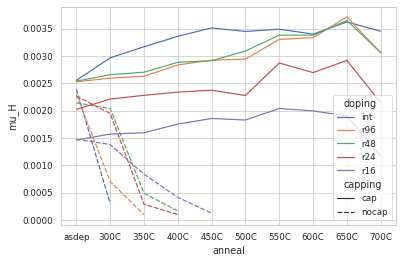

In [8]:
p = sns.lineplot(x = 'anneal',
                y = 'mu_H',
                style = 'capping',
                hue   = 'doping',
                data = df,
                )

#p.set(yscale = 'log')

p.get_figure().savefig(imagefolder + 'mu_H_vs_anneal.png')

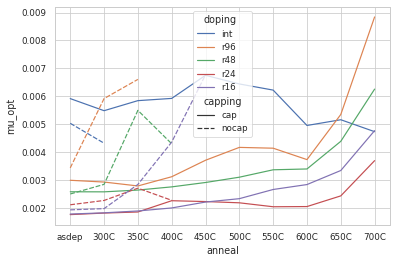

In [9]:
p = sns.lineplot(x = 'anneal',
                y = 'mu_opt',
                style = 'capping',
                hue   = 'doping',
                data = df,
                )

#p.set(yscale = 'log')

p.get_figure().savefig(imagefolder + 'mu_opt_vs_anneal.png')

## Carrier density

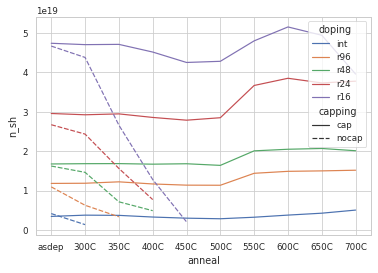

In [10]:
p = sns.lineplot(x = 'anneal',
                y = 'n_sh',
                style = 'capping',
                hue   = 'doping',
                data = hall_df,
                )
    
#p.set(yscale = 'log')

p.get_figure().savefig(imagefolder + 'n_sh_vs_anneal.png')

## Resistivity

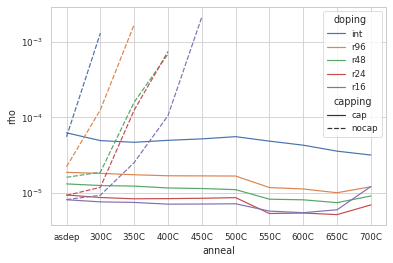

In [11]:
p = sns.lineplot(x = 'anneal',
                y = 'rho',
                style = 'capping',
                hue   = 'doping',
                data = hall_df,
                )
    
p.set(
    yscale = 'log',
)

p.get_figure().savefig(imagefolder + 'rho_sh_vs_anneal.png')

## Looking at trends in data!

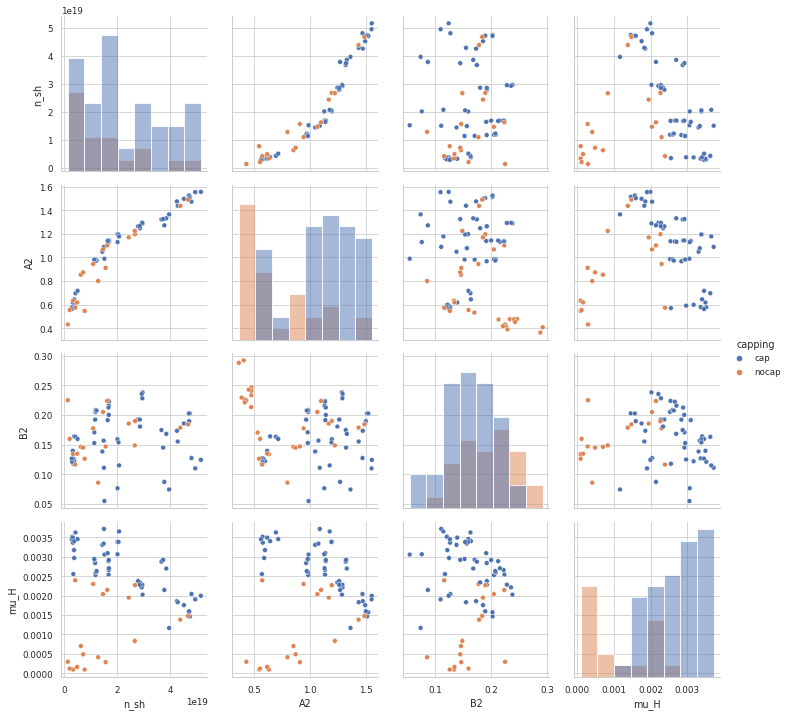

In [12]:
g = sns.PairGrid(df[['n_sh', 'A2', 'B2', 'mu_H','doping', 'capping']], hue = 'capping')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

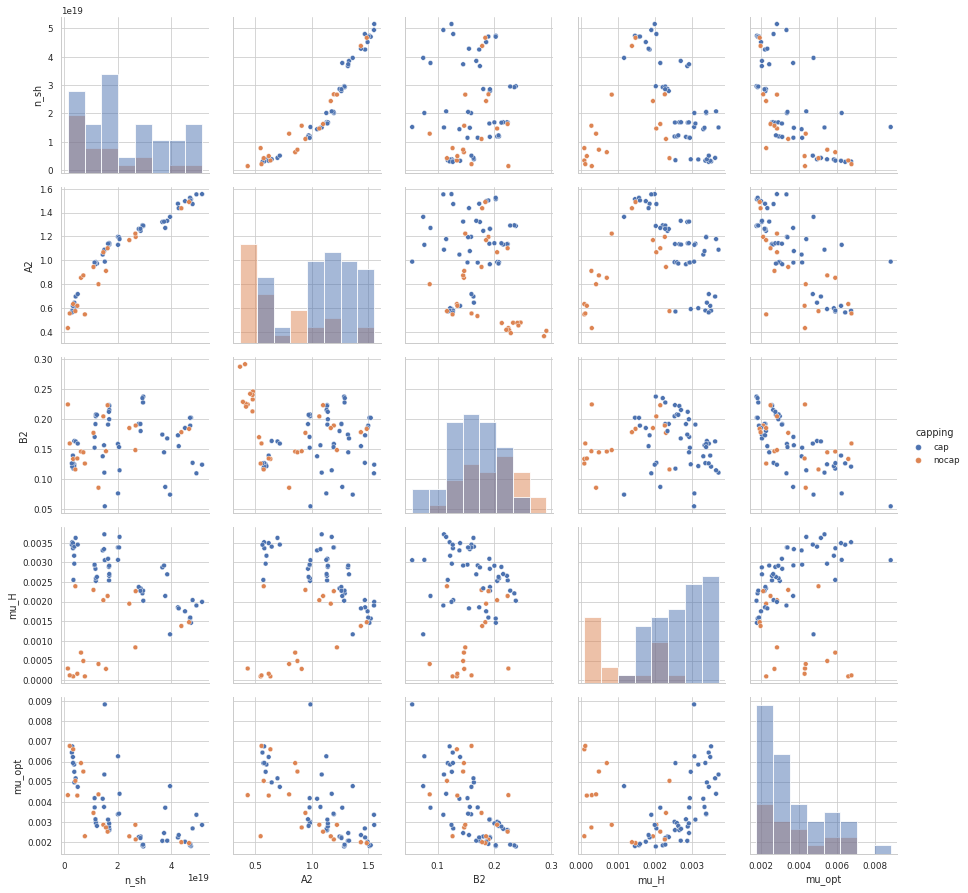

In [13]:
g = sns.PairGrid(df[['n_sh', 'A2', 'B2', 'mu_H','doping', 'capping', 'anneal', 'mu_opt']], hue = 'capping')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

<AxesSubplot:xlabel='anneal', ylabel='mu_opt'>

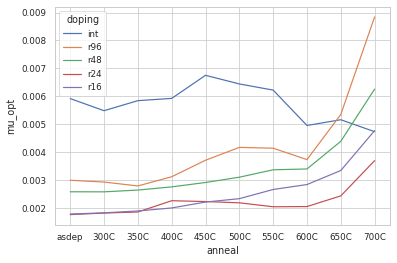

In [14]:
sns.lineplot(x = 'anneal', 
                y = 'mu_opt',
                hue = 'doping',
                data = df[df.capping == 'cap'])

Some clear clusters can be seen when coloring by doping, kind of neat.
Note that A2 (scattering frequency) and n_sh are nicely correlated (parabolic, as expected).

## Contact resistivities
I'll need to figure out how to use both substrate and anneal temperature as categories, should be possible.
For now: only separated by AZO doping.

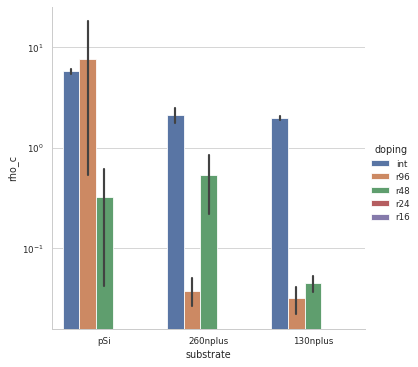

In [15]:
p = sns.catplot(x = 'substrate', y = 'rho_c', hue = 'doping', kind = 'bar', data = rho_df)
p.set(yscale = 'log')


# Effects of capping

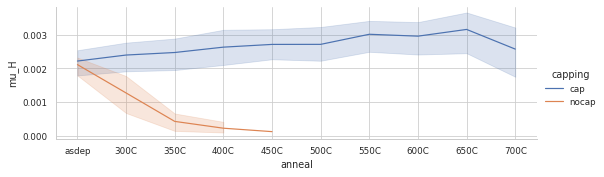

In [16]:
g = sns.PairGrid(
    df,
    x_vars = ['anneal'],
    y_vars = ['mu_H'],
    aspect = 3,
    hue  = 'capping',
)
g.map(sns.lineplot)
g.add_legend()

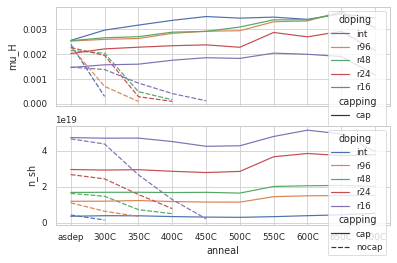

In [17]:
plot_var_list = ['mu_H', 'n_sh']
fig, ax_list = plt.subplots(
    nrows = len(plot_var_list), 
    sharex = True,
)

for plot_var, ax in zip(plot_var_list, ax_list):
    sns.lineplot(
        x = 'anneal',
        y = plot_var,
        style = 'capping',
        hue   = 'doping',
        data  = df,
        ax    = ax,
    )

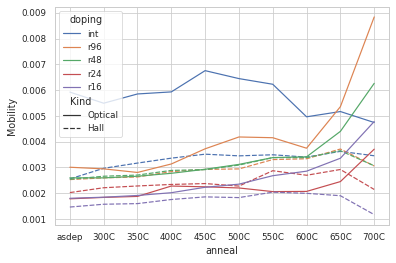

In [18]:
_ = (df[['doping', 'capping', 'anneal', 'mu_opt', 'mu_H']]
 .melt(id_vars = ['doping', 'capping', 'anneal'],
       value_vars = ['mu_opt', 'mu_H'],
       value_name = 'Mobility',
       var_name = 'Kind',
      )
 .replace({
     'mu_opt': 'Optical',
     'mu_H'  : 'Hall',
 })
)
p = sns.lineplot(
    x = 'anneal',
    y = 'Mobility',
    hue = 'doping',
    style = 'Kind',
    data = _[_.capping == 'cap']
)

p.get_figure().savefig(imagefolder + 'mobilities_vs_anneal.png')